In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import os
from os import path
import h5py
import sys
import Initialize_Paths as Paths

# Import Reading Functions
sys.path.insert(0, Paths.Surqct_path  + '/surqct/scripts/Paper_figures/')
from Reading import read_diatdata, read_HDF5, read_pops

In [2]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
# plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['legend.fontsize'] = 40

# Initializing Run 

In [3]:
SystName    = 'O3_UMN'
Dimension   = 'nondim'
InelRunNb   = 9
ExchRunNb   = 6
DissRunNb   = 55
ReactionFlgQCT    = '2_1_1_0'
ReactionFlgSurQCT = '2_1_1_0'
TempVec = [8000,10000]
PopPlotTime = [1e-6]

# Initializing System

In [4]:
import Initialize_System
Initialize = getattr(Initialize_System,'Initialize_'+SystName)
System = Initialize()

# Initializing Paths

In [5]:
QCT_ME_path    = Paths.Workspace_path + 'Air_Database/' + System.QCTMEPath
SurQCT_ME_path = Paths.Workspace_path + 'Air_Database/Run_0D_surQCT/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'

Data_ME_path   = Paths.Surqct_path + '0D/Data/' + System.Name + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'
Figure_ME_path = Paths.Surqct_path + '0D/Figures/' + System.Name + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'

try:
    os.makedirs(Figure_ME_path)
except OSError as e:
    pass

print('QCT Master Equation Path    :', QCT_ME_path)
print('SurQCT Master Equation Path :', SurQCT_ME_path)
print('Data Master Equation Path   :', Data_ME_path)
print('Figures Master Equation Path:', Figure_ME_path)

QCT Master Equation Path    : /home/venturi/WORKSPACE/Air_Database/Run_0D/
SurQCT Master Equation Path : /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_RunI9_E6_D55/
Data Master Equation Path   : /home/venturi/WORKSPACE/SurQCT/0D/Data/O3_UMN/nondim_RunI9_E6_D55/
Figures Master Equation Path: /home/venturi/WORKSPACE/SurQCT/0D/Figures/O3_UMN/nondim_RunI9_E6_D55/


# Read Diatomic Properties and Rates

In [6]:
# Read Diatomic Potentials
DiatData   = []

for iMol in range(System.NMolecules):
    DiatDataTemp = read_diatdata(System.PathToDiatFile[iMol], System.Molecule[iMol].Name, TempVec)
    DiatData.append(DiatDataTemp)
    System.Molecule[iMol].NLevels = np.size(DiatData[iMol]['EInt'].to_numpy())

Temp = TempVec[0]
# Read Rates
PathToHDF5File = System.PathToHDF5Fld+System.Name+'.hdf5'
System = read_HDF5(System, PathToHDF5File, Temp, Temp)


[HCN]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE/CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[HCN]:   Reading Rates Data from: /home/venturi/WORKSPACE/Air_Database/HDF5_Database/O3_UMN.hdf5


# Reading Master Equation Solution Files

In [ ]:
QCT=[]
SurQCT=[]
PopQCT = []
PopSurQCT = []

for iTemp in range(len(TempVec)):

    Temp = TempVec[iTemp]
    
    # QCT
    FileName=QCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgQCT+'/box.dat'
    QCTTemp=pd.read_csv(FileName,delimiter='  ')
    QCTTemp.columns = System.Box_Header
    QCT.append(QCTTemp)
    QCT[iTemp].NSteps = np.size(QCT[iTemp]['time'].to_numpy()) 

    PopFilePath=QCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgQCT
    PopTempQCT=read_pops(PopFilePath,System,DiatData,QCT[iTemp].time)
    PopQCT.append(PopTempQCT)

    # SurQCT
    FileName=SurQCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT+'/box.dat'
    SurQCTTemp=pd.read_csv(FileName,delimiter='  ')
    SurQCTTemp.columns = System.Box_Header
    SurQCT.append(SurQCTTemp)
    SurQCT[iTemp].NSteps = np.size(SurQCT[iTemp]['time'].to_numpy()) 
    
    PopFilePath=SurQCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT
    PopTempSurQCT=read_pops(PopFilePath,System,DiatData,SurQCT[iTemp].time)
    PopSurQCT.append(PopTempSurQCT)

<ipython-input-7-a99c3ce92033>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  QCTTemp=pd.read_csv(FileName,delimiter='  ')


[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D/output_O3_UMN_T8000K_2_1_1_0


/home/venturi/WORKSPACE/SurQCT//surqct/scripts/Paper_figures/Reading.py:113: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Pop=pd.read_csv(FileName,sep="   ",skiprows=2,header=None,index_col=False,comment='&')
/home/venturi/WORKSPACE/SurQCT//surqct/scripts/Paper_figures/Reading.py:116: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Pop.Pop_g = np.reshape(Pop.PopTemp.to_numpy(),(np.size(time)+1,System.Molecule[0].NLevels))
/home/venturi/WORKSPACE/SurQCT//surqct/scripts/Paper_figures/Reading.py:117: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Pop.Pop = DiatData[

[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_RunI9_E6_D55/output_O3_UMN_T8000K_2_1_1_0
[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D/output_O3_UMN_T10000K_2_1_1_0
[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_RunI9_E6_D55/output_O3_UMN_T10000K_2_1_1_0


# Compute

In [ ]:
from Compute import compute_energy

for iTemp in range(len(TempVec)):

    Temp = TempVec[iTemp]
    QCT[iTemp].eRot, QCT[iTemp].eVib = compute_energy(System, PopQCT[iTemp].Pop, DiatData, QCT[iTemp])
    SurQCT[iTemp].eRot, SurQCT[iTemp].eVib = compute_energy(System, PopSurQCT[iTemp].Pop, DiatData, SurQCT[iTemp])

# Plots

In [ ]:
# Mole fraction Plot                                                                                                                                                                                                                                         
def Plot_MoleFraction(System,QCT,SurQCT,TempVec,MoleFractionXLim):                                                                                                                                                                                                            

    fig,ax = plt.subplots(1,1,figsize=(10,10))
    MoleculeName = System.Molecule[0].Name                                                                                                                                                                                                               
    plt.plot(QCT.time, QCT[MoleculeName], '-k', label='QCT',linewidth=5)                                                                                                                                                                   
    plt.plot(SurQCT.time, SurQCT[MoleculeName], '-r', label='SurQCT',linewidth=5)                                                                                                                                                          
                                                                                                                                                                                                                                                             
    plt.legend(frameon=False)                                                                                                                                                                                                                            
    plt.xscale('linear')                                                                                                                                                                                                                                 
    plt.xlabel('t [s]')                                                                                                                                                                                                                                  
    plt.ylabel('X')                                                                                                                                                                                                                                      
    plt.xlim(MoleFractionXLim)                                                                                                                                                                                                                    
    ax.xaxis.set_minor_locator(AutoMinorLocator())                                                                                                                                                                                                       
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')                                                                                                                                                                                                             
    fig.tight_layout(pad=0.5)                                                                                                                                                                                                                            
                                                                                                                                                                                                                                           
    return fig                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                             
def Plot_Energies(System,QCT,SurQCT,TempVec):                                                                                                                                                                                                                
    
    iTemp = 0
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    plt.plot(QCT[iTemp].time, QCT[iTemp].eRot,'--k', label='ERot',linewidth=3)                                                                                                                                                                           
    plt.plot(QCT[iTemp].time, QCT[iTemp].eVib, '-k', label='EVib',linewidth=3)                                                                                                                                                                           
        
    for iTemp in range(len(TempVec)):                                                                                                                                                                                                                        
        Temp = TempVec[iTemp]                                                                                                                                                                                                                                
        
        plt.plot(QCT[iTemp].time, QCT[iTemp].eRot,'--k', linewidth=3) 
        plt.plot(QCT[iTemp].time, QCT[iTemp].eVib, '-k', linewidth=3)                                                                                                                                                                           
        plt.plot(SurQCT[iTemp].time, SurQCT[iTemp].eRot, color='red', linestyle='dashed', linewidth=5)                                                                                                                                                                                        
        plt.plot(SurQCT[iTemp].time, SurQCT[iTemp].eVib, color='red',linestyle='-', linewidth=5)                                                                                                                                                                                        
                                                                                                                                                                                                                                                             
        plt.legend(frameon=False)                                                                                                                                                                                                                            
        plt.xscale('log')                                                                                                                                                                                                                                    
        plt.xlabel('t [s]')                                                                                                                                                                                                                                  
        plt.ylabel('E [eV]')                                                                                                                                                                                                                                 
        plt.xlim([1e-9,1e-3]) 
        ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box') 
        fig.tight_layout(pad=0.5)                                                                                                                                                                                                                            
                                                                                                                                                                                                                                                        
    return fig  

def Plot_KDth_qss(System,Data_ME_path,KDXLim):                                                                                                                                                                                                                                   
                                                                                                                                                                                                                                                             
    QCT_KDFile = Data_ME_path+'/QCT_KGlobal_'+ReactionFlgSurQCT+'_'+System.Molecule[0].Name+'.csv'                                                                                                                                                                   
    QCT_KD = pd.read_csv(QCT_KDFile,header=None,skiprows=1)                                                                                                                                                                                                  
    QCT_KD.columns = ['Temp','KdissTh','KexchTh','KdissQSS','KexchQSS']                                                                                                                                                                                      
                                                                                                                                                                                                                                                             
    SurQCT_KDFile = Data_ME_path+'/DNN_KGlobal_'+ReactionFlgSurQCT+'_'+System.Molecule[0].Name+'.csv'                                                                                                                                                                 
    SurQCT_KD = pd.read_csv(SurQCT_KDFile,header=None,skiprows=1)                                                                                                                                                                                               
    SurQCT_KD.columns = ['Temp','KdissTh','KexchTh','KdissQSS','KexchQSS']                                                                                                                                                                                   
           
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    plt.plot(10000/QCT_KD.Temp, QCT_KD.KdissTh, 'ks', markersize=10, label='$k^D_{Th}$')                                                                                                                                                                                                      
    plt.plot(10000/SurQCT_KD.Temp, SurQCT_KD.KdissTh, '--rs',markersize=7,linewidth=3)   
    
    plt.plot(10000/QCT_KD.Temp, QCT_KD.KdissQSS, 'ko', markersize=10, label='$k^D_{QSS}$')                                                                                                                                                                                                      
    plt.plot(10000/SurQCT_KD.Temp, SurQCT_KD.KdissQSS, ':ro',markersize=7,linewidth=3)
    
    plt.legend(frameon=False)                                                                                                                                                                                                                                
    plt.yscale('log')                                                                                                                                                                                                                                        
    plt.xlabel('10000/T [K$^{-1}$]')                                                                                                                                                                                                                                    
    plt.ylabel('$k^D$ [cm$^3$/s]')                                                                                                                                                                                                                           
    plt.xlim(KDXLim)                                                                                                                                                                                                                                          
    plt.ylim([1e-15,1e-9])    
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    fig.tight_layout(pad=1.0) 
                                                                                                                                                                                                                                                             
    return fig                                                                                                                                                                                                                                               

def Plot_taus(System,Data_ME_path):                                                                                                                                                                                                                                       
                                                                                                                                                                                                                                                             
    QCT_tausFile = Data_ME_path+'/QCT_Taus_'+System.Molecule[0].Name+'_'+ReactionFlgQCT+'.csv'                                                                                                                                                                    
    QCT_taus = pd.read_csv(QCT_tausFile,header=None,skiprows=1)                                                                                                                                                                                              
    QCT_taus.columns = ['Temp','P','tauInt','tauRot','tauVib']                                                                                                                                                                                                   
                                                                                                                                                                                                                                                             
    SurQCT_tausFile = Data_ME_path+'/DNN_Taus_'+System.Molecule[0].Name+'_'+ReactionFlgSurQCT+'.csv'                                                                                                                                                                 
    SurQCT_taus = pd.read_csv(SurQCT_tausFile,header=None,skiprows=1)                                                                                                                                                                                           
    SurQCT_taus.columns = ['Temp','P','tauInt','tauRot','tauVib']                                                                                                                                                                                                

    fig,ax = plt.subplots(1,1,figsize=(10,10))
    plt.plot(QCT_taus.Temp, QCT_taus.tauRot, 'ks', markersize=10, label='$\\tau_{Rot}$')                                                                                                                                                                                                      
    plt.plot(SurQCT_taus.Temp, SurQCT_taus.tauRot, 'rs', markersize=10)   
    
    plt.plot(QCT_taus.Temp, QCT_taus.tauVib, 'k^', markersize=10, label='$\\tau_{Vib}$')                                                                                                                                                                                                      
    plt.plot(SurQCT_taus.Temp, SurQCT_taus.tauVib, 'r^' , markersize=10)
    
    plt.legend(frameon=False)                                                                                                                                                                                                                                
    plt.yscale('log')                                                                                                                                                                                                                                        
    plt.xlabel('T [K]')                                                                                                                                                                                                                                    
    plt.ylabel('$\\tau$ [atm*s]')                                                                                                                                                                                                                           
#     plt.xlim([0,3])                                                                                                                                                                                                                                          
    plt.ylim([1e-9,1e-7])    
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    fig.tight_layout(pad=1.0) 
    
    return fig 

In [ ]:
# from Plots import Plot_MoleFraction, Plot_Energies
MoleFractionXLim=[[0,4e-4],[0,3e-6]]
for iTemp in range(len(TempVec)):                                                                                                                                                                                                                        
    Temp = TempVec[iTemp] 
    fig = Plot_MoleFraction(System,QCT[iTemp],SurQCT[iTemp],TempVec,MoleFractionXLim[iTemp])
    plt.savefig((Figure_ME_path+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT+'_X.eps'), format='eps', dpi=150)

fig = Plot_Energies(System,QCT,SurQCT,TempVec)
# plt.savefig((Figure_ME_path+System.Name+'_'+ReactionFlgSurQCT+'_Energy.eps'), format='eps', dpi=150)

ValueError: not enough values to unpack (expected 2, got 1)

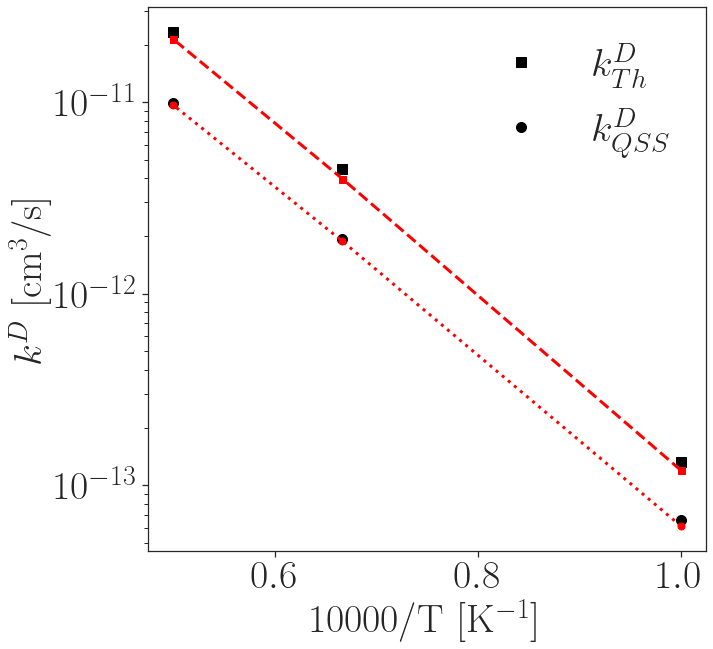

In [19]:
KDXLim=[[0,1.5]] # Need to add to system

fig = Plot_KDth_qss(System, Data_ME_path,KDXLim)
plt.savefig((Figure_ME_path+System.Name+'_'+ReactionFlgSurQCT+'_KD.eps'), format='eps', dpi=150)

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


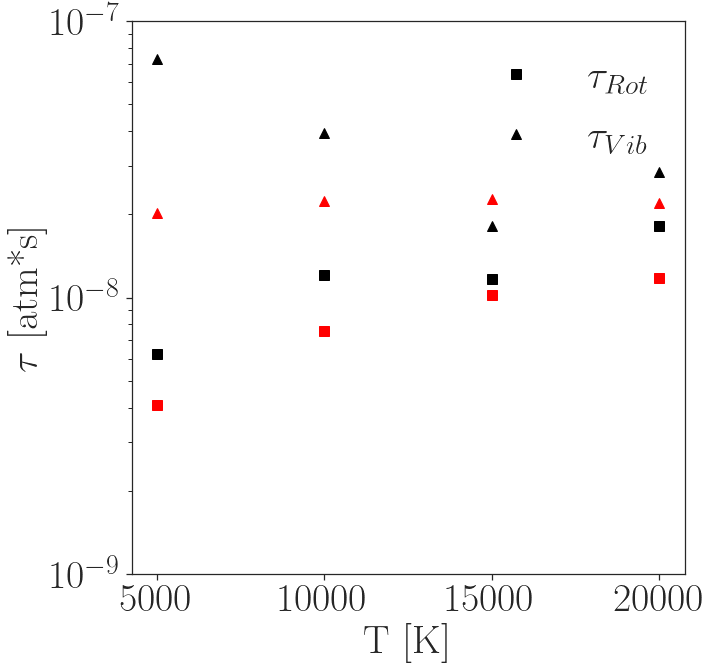

In [9]:
fig = Plot_taus(System, Data_ME_path)
plt.savefig((Figure_ME_path+System.Name+'_'+ReactionFlgSurQCT+'_taus.eps'), format='eps', dpi=150)

In [ ]:
# Population plot times                                                                                                                                                                                                                                      
def find_nearest(array, value):                                                                                                                                                                                                                              
    i = 0                                                                                                                                                                                                                                                    
    iStep=[]                                                                                                                                                                                                                                                 
    for ivalue in value:                                                                                                                                                                                                                                     
        array = np.asarray(array)                                                                                                                                                                                                                            
        idx = (np.abs(array - ivalue)).argmin()                                                                                                                                                                                                              
        iStep.append(idx)                                                                                                                                                                                                                                    
        i = i+1                                                                                                                                                                                                                                              
    return iStep   


def Plot_Populations(iTemp,plot_times,QSSFlg):                                                                                                                                                                                                                                      
                                                                                                                                                                                                                                                             
    iStepVec = find_nearest(QCT[iTemp].time, plot_times)                                                                                                                                                                                                     
    iStepVecSurQCT = find_nearest(SurQCT[iTemp].time, plot_times)  

    for iStep in range(len(iStepVec)):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        fig,ax = plt.subplots(1,1,figsize=(18,9))                                                                                                                                                                                                                
        cmap=mpl.colors.ListedColormap(["k","mediumvioletred","slategray","yellowgreen","sandybrown","sienna","b","c","g","cyan","navy","crimson","limegreen","gold","r","y"])                                                                                                                                                                                                                                                                                             
        cp = ax.scatter(DiatData[0]['EInt'], PopQCT[iTemp].Pop_g[iStepVec[iStep],:], c='k',label='QCT')                                                                                                                                                               
        cp = ax.scatter(DiatData[0]['EInt'], PopSurQCT[iTemp].Pop_g[iStepVecSurQCT[iStep],:], c='r',label='SurQCT')                                                                                                                                                                                                                                                                                                                                                     
                                                                                                                                                                                                                                     
        plt.legend(frameon=False)                                                                                                                                                                                                                            
        plt.yscale('log')                                                                                                                                                                                                                                    
        plt.xlabel('$\epsilon$ [eV]')                                                                                                                                                                                                                        
        plt.ylabel('$N_i/g_i$ [m$^{-3}$]')                                                                                                                                                                                                                   
        fig.tight_layout(pad=0.5) 
        if(QSSFlg):
            title='QSS'
            plt.title(title)
            plt.savefig((Figure_ME_path+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT+'_pop_'+System.Molecule[0].Name+'_QSS.eps'), format='eps', dpi=150)
        else:
            title='t = '+str(QCT[iTemp].time[iStep])+' s' 
            plt.title(title)
            plt.savefig((Figure_ME_path+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT+'_pop_'+System.Molecule[0].Name+'_'+str(iStep)+'.eps'), format='eps', dpi=150)
        return fig

In [ ]:
plot_times=[2e-6]
QSSFlg=False

for iTemp in range(len(TempVec)):                                                                                                                                                                                                                        
    Temp = TempVec[iTemp]
    fig=Plot_Populations(iTemp,plot_times,QSSFlg)                                                                                                      

# Plot QSS Distribution
QSSFlg=True
plot_times=[2e-6]

for iTemp in range(len(TempVec)):                                                                                                                                                                                                                        
    Temp = TempVec[iTemp]
    fig=Plot_Populations(iTemp,plot_times[iTemp],QSSFlg)                                                                                                      